# Titanic Data Exploration

In [ ]:
%matplotlib inline
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2

In [84]:
train_data = pandas.read_csv("./titanic data/train.csv")

In [85]:
print train_data.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Survival rate based on sex (males versus females)

In [86]:
sex_data = train_data.groupby("Sex")
print sex_data["Survived"].count()

Sex
female    314
male      577
Name: Survived, dtype: int64


In [87]:
sex_data.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.915709   44.479818    0.649682   431.028662    2.159236   
       std     14.110146   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     18.000000   12.071875    0.000000   231.750000    1.000000   
       50%     27.000000   23.000000    0.000000   414.500000    2.000000   
       75%     37.000000   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  453.000000  577.000000  577.000000   577.000000  577.000000   
       mean    30.726645   25.523893    0.235702   454.147314    2.389948   
       std     14.678201   43.138263    0.612294   257.486139    0.813580   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%     21.000000    7.895800    0.000000   222.000000    2.000000   
       50%     29.000000   10.500000    0.000000   464.000000    3.000000   
       75%     39.000000   26.550000    0.000000   680.000000    3.000000   
       max     80.000000  512.329200    5.000000   891.000000    3.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

In [88]:
print sex_data["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


#### From the data above, it seems like the female has a higher survived rate than the male does

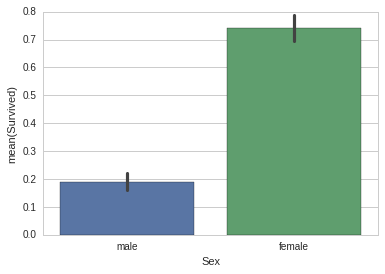

In [89]:
sns.set_style("whitegrid")
sns.barplot(x = "Sex", y = "Survived", data = train_data)

#### The graph also proves that the female tends to have a higher survived rate than the male does

## Survival rate based on age (young versus old)

In [91]:
train_data["New_age"] = train_data["Age"]
train_data.loc[train_data["Age"] < 50, "New_age"] = "young"
train_data.loc[train_data["Age"] >= 50, "New_age"] = "old"

In [92]:
Age_data = train_data.groupby("New_age")
print Age_data.size()

New_age
old       74
young    640
dtype: int64


In [93]:
print Age_data["Survived"].mean()

New_age
old      0.364865
young    0.410938
Name: Survived, dtype: float64


#### Based on intuition, it makes sense that young people may be more physically stronger than the old people so they have higher survived rate than the old people do. 

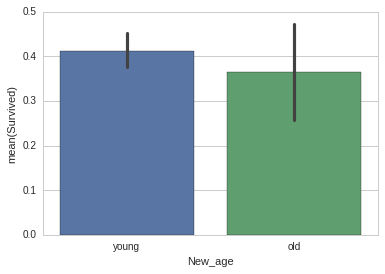

In [94]:
sns.barplot(x = "New_age", y = "Survived", data = train_data)

#### Even though it is not that obvious in the graph, we still can see the left blue bar is slightly higher than the right green one

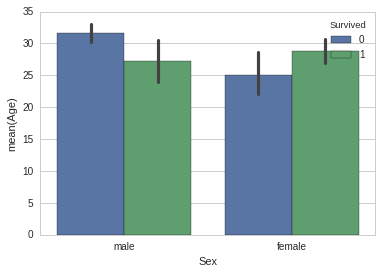

In [95]:
sns.barplot(x = "Sex", y = "Age", hue= "Survived", data = train_data)

#### In this graph, we graph the categories of sex, age and survived rate all together. 

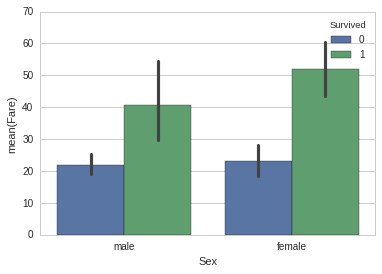

In [96]:
sns.barplot(x = "Sex", y = "Fare", hue = "Survived", data = train_data)

#### In this graph, we graph the categories of sex, fare and survived rate all together.  It seems like women who pay the high fare fee have the highest surved amount here. 

##  Survived rate of young men versus older men

In [113]:
tmp_data = train_data.groupby(["Sex", "New_age"])
young_man = tmp_data.get_group(('male', 'young'))
old_man = tmp_data.get_group(('male', 'old'))
print "Old man average survived rate: ", old_man['Survived'].mean()
print "Young man average survived rate: ", young_man['Survived'].mean()

Old man average survived rate:  0.134615384615
Young man average survived rate:  0.214463840399


#### From the average surved rate comparison, we can see that the young man has higher survived rate

## Survived rate of rich women versus poor women

In [117]:
tmp_data = train_data.groupby(["Sex", "Pclass"])
high_class_woman = tmp_data.get_group(('female', 1))
middle_class_woman = tmp_data.get_group(('female', 2))
low_class_woman = tmp_data.get_group(('female', 3))
print "Low class woman average survived rate: ", low_class_woman['Survived'].mean()
print "Middle class woman average survived rate: ", middle_class_woman['Survived'].mean()
print "High class woman average survived rate: ", high_class_woman['Survived'].mean()


Low class woman average survived rate:  0.5
Middle class woman average survived rate:  0.921052631579
High class woman average survived rate:  0.968085106383


#### From the average surved rate comparison, we can see that the higher class women have the higher survived rate

## Survived rate of rich man versus poor man

In [118]:
high_class_man = tmp_data.get_group(('male', 1))
middle_class_man = tmp_data.get_group(('male', 2))
low_class_man = tmp_data.get_group(('male', 3))
print "Low class woman average survived rate: ", low_class_man['Survived'].mean()
print "Middle class woman average survived rate: ", middle_class_man['Survived'].mean()
print "High class woman average survived rate: ", high_class_man['Survived'].mean()

Low class woman average survived rate:  0.135446685879
Middle class woman average survived rate:  0.157407407407
High class woman average survived rate:  0.368852459016


#### From the average surved rate comparison, we can see that the higher class men have the higher survived rate

## Scatter plot for age versus survived rate

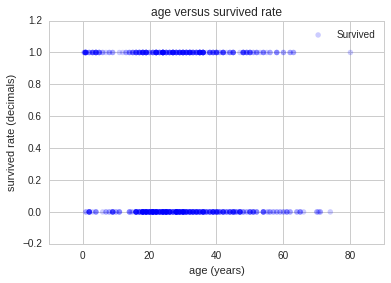

In [121]:
thinkplot.Scatter(train_data["Age"], train_data["Survived"])
thinkplot.Show(xlabel = 'age (years)', ylabel = 'survived rate (decimals)', title = 'age versus survived rate')

#### From the scatter plot, it seems that the unsurvived people cover more in the range of older people and the survied people cover more in the range of younger or middle age people